In [1]:
import regressionImputer as ri
import knnimputer as ki
import interpolation as ip

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import missingno as mno
import datetime
import random
import time

from sklearn import datasets
from sklearn.cluster import DBSCAN
from scipy.stats import skew

In [2]:
PATH="C:\\Users\\98gud\\Desktop\\pck\\dataset\\"

iris =datasets.load_iris()
iris=pd.DataFrame(data=np.c_[iris['data'],iris['target']],columns=iris['feature_names']+['target'])
iris['target']=iris['target'].map({0:"setosa",1:"versicolor",2:"virginica"})

iris_original=iris.copy(deep=True)

In [3]:
## random하게 난수 생성 하기 
## 난수 발생시킬 필드를 리스트 형태로 input 

def randomrandom (df,mratio,cols):
    random.seed(1022)
    num_miss=int(mratio*len(df))
    for col in cols:
        missing_index=random.sample(range(0,len(df)),num_miss)
        for i in missing_index:
            df.loc[df.index[i],col]=np.nan
    return df
   

In [4]:
iris_original.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [5]:
def comparingbar(df,cols,k):
    ## petal length 와 petal width 사이의 상관관계는 강한 것처럼 보이나, 그 외의 것들은 모호함
## petal length 와 petal width 의 분포는 정규분포와 사뭇 멀어보임
## 그리고 target 이라는 col은 string data type을 가짐 
## 또한 결측치가 존재하지 않으므로, 직접 생성함 

    ratios=[0.1,0.3,0.5]
    fig,axes=plt.subplots(3,3,figsize=(20,20))
    for i,ratio in enumerate(ratios):
        x=df.copy(deep=True)
        x=randomrandom(x,ratio,cols)
        
        start=time.time()
        df_=x.copy(deep=True)
        df_1=ri.deterministicR(df_)
        end=time.time()
        print(f"regreesion 이용에 걸린 시간은 {start-end}입니다")
        
        start=time.time()
        df_=x.copy(deep=True)
        df_2=ip.imputing(df_)
        end=time.time()
        print(f"interpolation 이용에 걸린 시간은 {end-start}입니다")
        df_=x.copy(deep=True)
        start=time.time()
        df_3=ki.KNNImpute(df_)
        end=time.time()
        print(f"knn 이용에 걸린 시간은 {end-start}입니다")
        
        #df4=x.select_dtypes(include=np.number)
        #start=time.time()
        #observed=df4.loc[df4[k].notnull(),k]
        #df4[k+"imputed"]=df4[k]
        #df4.loc[df4[k].isnull(),k+"imputed"]=df4[k].mean()
        #df4=pd.DataFrame(df4,columns=df4.columns)
        #params=list(set(df4.columns)-{k})
        #dbscan=DBSCAN(min_samples=5)
        #model=dbscan.fit(df4[params])
        #labels=model.labels_
        #df4['y']=labels
        #display(df4.y.value_counts())
        #l=df4.groupby('y').mean()
        #display(l)

        
        #for idx in df4[df4[k].isnull()].index.tolist():
         #   value=l.iloc[df4.iloc[idx, df4.columns.get_loc('y')]+1,df4.columns.get_loc(k)]
          #  df4.iloc[idx, df4.columns.get_loc(k)]=value
        
        #for col2 in df.columns:
         #   if col2 not in df4.columns:
          #      df4[col2]=df[col2]
                
        #mno.matrix(df4)
        #end=time.time()
        #print(f"DBSCAN 이용에 걸린 시간은 {end-start}입니다")

        
        compare=pd.DataFrame()
        
        compare['sum']=[(df[k].sum()-df_1[0][k+"imputed"].sum())/df[k].sum(),
                       (df[k].sum()-df_2[k].sum())/df[k].sum(),
                       (df[k].sum()-df_3[k].sum())/df[k].sum()
                         #(df[k].sum()-df4[k].sum())/df[k].sum()
                       ]
        compare['mean']=[(df[k].mean()-df_1[0][k+"imputed"].mean())/df[k].mean(),
                        (df[k].mean()-df_2[k].mean())/df[k].mean(),
                        (df[k].mean()-df_3[k].mean())/df[k].mean()
                         #(df[k].mean()-df4[k].mean())/df[k].mean()
                        ]
        compare['var']=[(df[k].var()-df_1[0][k+"imputed"].var())/df[k].var(),
                       (df[k].var()-df_2[k].var())/df[k].var(),
                       (df[k].var()-df_3[k].var())/df[k].var()
                        #(df[k].var()-df4[k].var())/df[k].var()
                       ]
        compare.index=['regression','interpolation','knn']
        sns.barplot(x=compare.index,y=compare['mean'],ax=axes[0][i%3])
        sns.barplot(x=compare.index,y=compare['var'],ax=axes[1][i%3])
        display(compare)
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        
      
        sns.kdeplot(df_1[0][k+"imputed"],label="regression",ax=axes[2][i%3])
        sns.kdeplot(df_2[k],label="interpolation",ax=axes[2][i%3])
        sns.kdeplot(df_3[k],label="knn",ax=axes[2][i%3])
       # sns.kdeplot(df4[k],label="DBSCAN",ax=axes[2][i%3])
        sns.kdeplot(df[k],label="before",ax=axes[2][i%3])
        plt.legend()
       
        
        
   
        

## 1. iris 데이터
### 1.0 데이터 분석
### 1.1 하나의 col에만 존재하는 경우
#### 1.1.1regression impute(10%, 30%, 50%)
#### 1.1.2 linear interpolaton(10%, 30%, 50%)
#### 1.1.3 knn impute(10%, 30%, 50%)
### 1.2 모든 col에만 존재하는 경우
#### 1.2.1regression impute(10%, 30%, 50%)
#### 1.2.2 linear interpolaton(10%, 30%, 50%)
#### 1.2.3 knn impute(10%, 30%, 50%)


## 2. GME 데이터
### 2.0 데이터 분석
### 2.1 하나의 col에만 존재하는 경우
#### 2.1.1regression impute(10%, 30%, 50%)
#### 2.1.2 linear interpolaton(10%, 30%, 50%)
#### 2.1.3 knn impute(10%, 30%, 50%)
### 2.2 모든 col에만 존재하는 경우
#### 2.2.1regression impute(10%, 30%, 50%)
#### 2.2.2 linear interpolaton(10%, 30%, 50%)
#### 2.2.3 knn impute(10%, 30%, 50%)


## 3. fraud 데이터
### 3.0 데이터 분석
### 3.1 하나의 col에만 존재하는 경우
#### 3.1.1regression impute(10%, 30%, 50%)
#### 3.1.2 linear interpolaton(10%, 30%, 50%)
#### 3.1.3 knn impute(10%, 30%, 50%)
### 3.2 모든 col에만 존재하는 경우
#### 3.2.1. regression impute(10%, 30%, 50%)
#### 3.2.2 linear interpolaton(10%, 30%, 50%)
#### 3.2.3 knn impute(10%, 30%, 50%)

In [6]:
### 1. 0 데이터 분석

display(iris.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
display(iris.describe())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:>

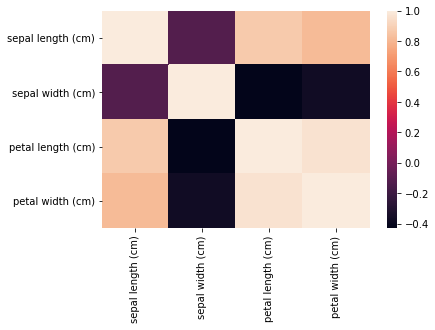

In [9]:
sns.heatmap(iris.corr())

In [10]:
display(iris.corr())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


IndexError: index 2 is out of bounds for axis 0 with size 2

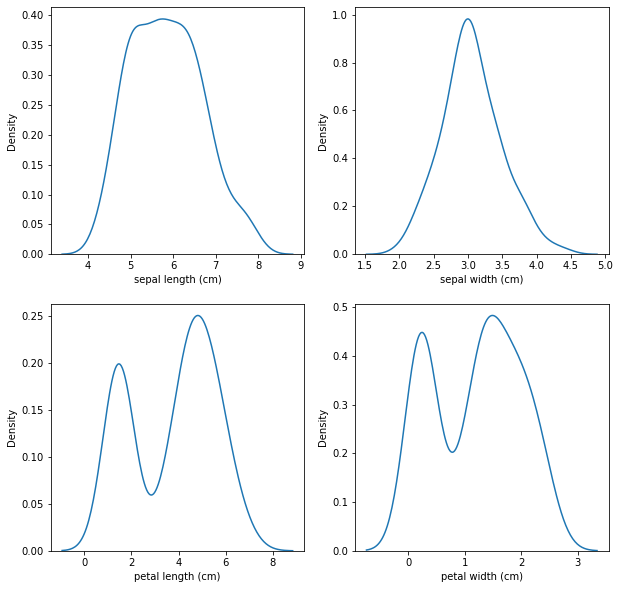

In [11]:
fig,axes=plt.subplots(2,2,figsize=(10,10))
for i, col in enumerate(iris.columns):
    sns.kdeplot(iris[col],ax=axes[int(i/2)][i%2])

In [12]:
## petal length 와 petal width 사이의 상관관계는 강한 것처럼 보이나, 그 외의 것들은 모호함
## petal length 와 petal width 의 분포는 정규분포와 사뭇 멀어보임
## 그리고 target 이라는 col은 string data type을 가짐 
## 또한 결측치가 존재하지 않으므로, 직접 생성함 

### 1.1 하나의 col에만 존재하는 경우(10%, 30%, 50%)
#### 1.1.1regression impute
#### 1.1.2 linear interpolaton
#### 1.1.3 knn impute

regreesion 이용에 걸린 시간은 -0.015648603439331055입니다
values 방법을 이용합니다.
interpolation 이용에 걸린 시간은 0.0입니다
knn 이용에 걸린 시간은 0.0입니다


,sum,mean,var
regression,-0.002901,-0.002901,0.021819
interpolation,-0.000355,-0.000355,0.019723
knn,-0.002377,-0.002377,0.010299


No handles with labels found to put in legend.


regreesion 이용에 걸린 시간은 -0.010969400405883789입니다
values 방법을 이용합니다.
interpolation 이용에 걸린 시간은 0.001996278762817383입니다
knn 이용에 걸린 시간은 0.0039997100830078125입니다


,sum,mean,var
regression,0.001604,0.001604,0.183558
interpolation,-0.000621,-0.000621,0.024873
knn,0.000426,0.000426,0.042122


No handles with labels found to put in legend.


regreesion 이용에 걸린 시간은 -0.008997678756713867입니다
values 방법을 이용합니다.
interpolation 이용에 걸린 시간은 0.0029993057250976562입니다
knn 이용에 걸린 시간은 0.004000425338745117입니다


,sum,mean,var
regression,0.030938,0.030938,0.394365
interpolation,0.018538,0.018538,0.040142
knn,-0.000461,-0.000461,0.038967


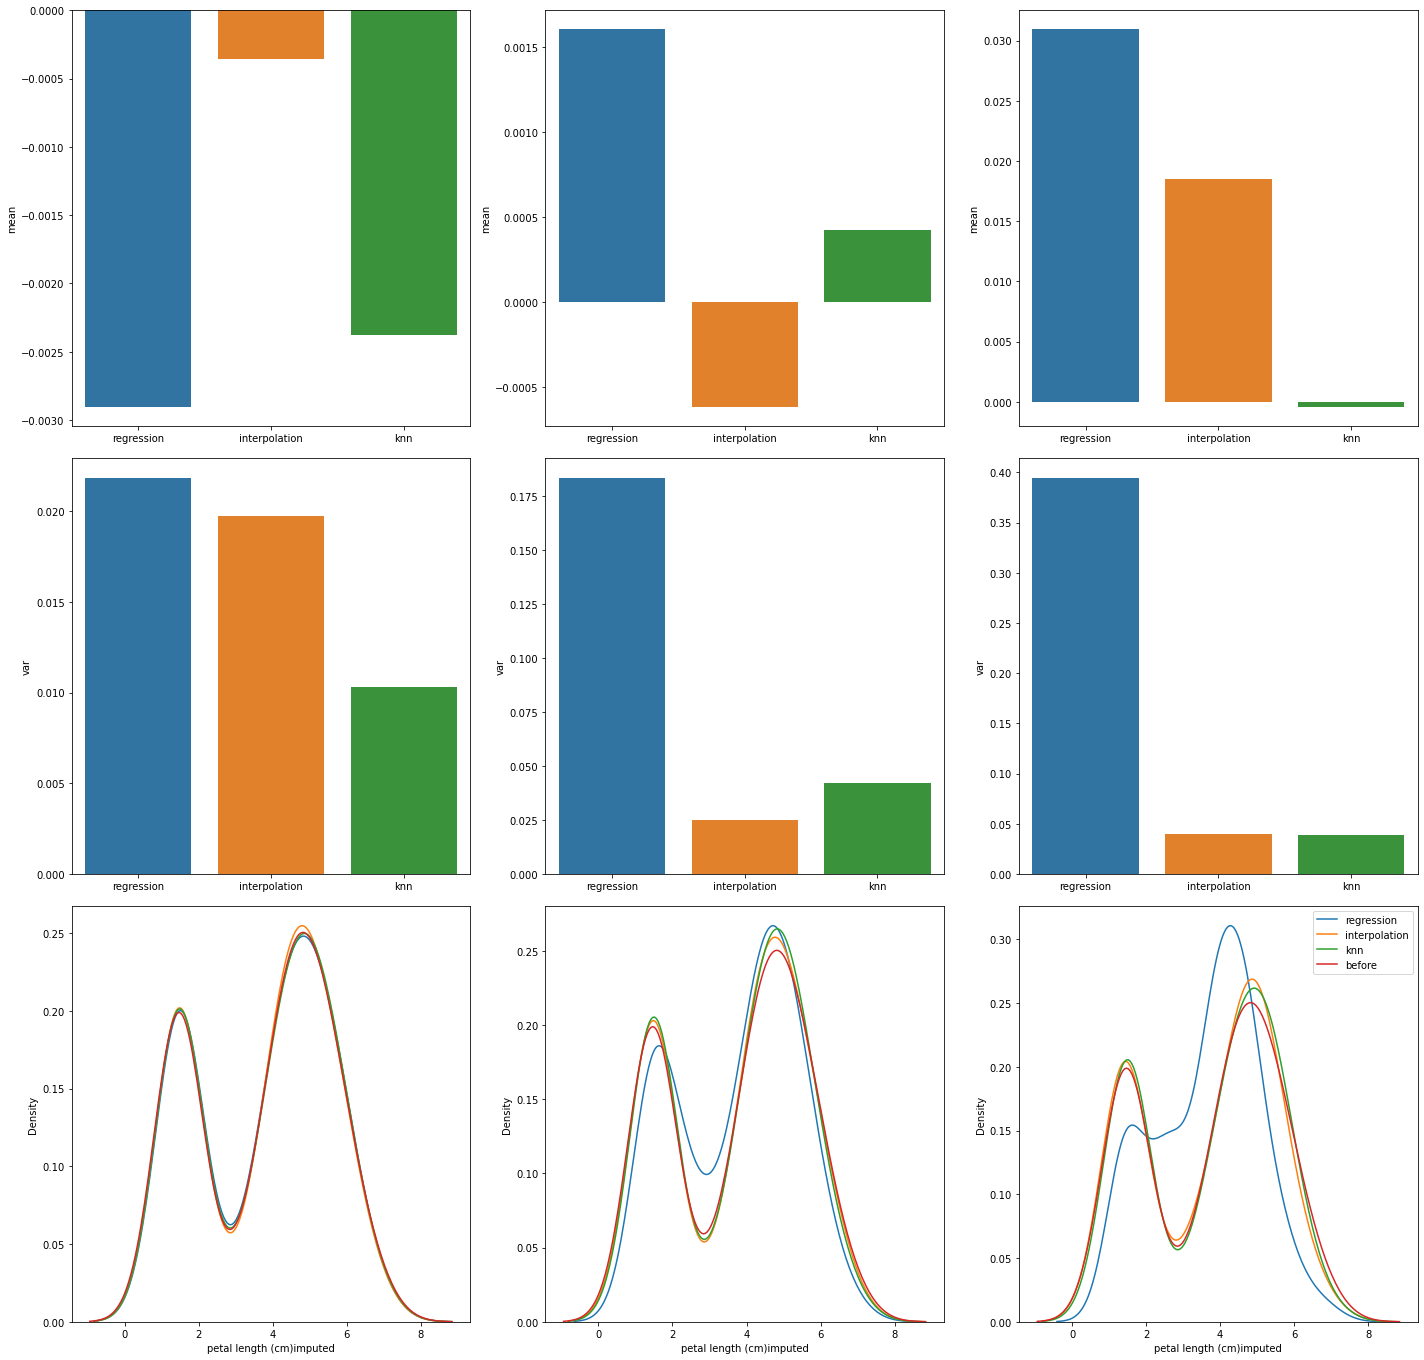

In [8]:
## 10% mean ### 30% mean ## 50% mean
######################################
## 10% var ## 30% var ## 50% var


comparingbar(iris,['petal length (cm)'],k="petal length (cm)")

### 1.2 모든 col에만 존재하는 경우(10%, 30%, 50%)
#### 1.2.1regression impute
#### 1.2.2 linear interpolaton
#### 1.2.3 knn impute

regreesion 이용에 걸린 시간은 -0.03125262260437012입니다
values 방법을 이용합니다.
interpolation 이용에 걸린 시간은 0.0입니다
knn 이용에 걸린 시간은 0.0입니다


,sum,mean,var
regression,0.000708,0.000708,0.054959
interpolation,-0.003016,-0.003016,0.004762
knn,0.002271,0.002271,0.011981


No handles with labels found to put in legend.


regreesion 이용에 걸린 시간은 -0.03473925590515137입니다
values 방법을 이용합니다.
interpolation 이용에 걸린 시간은 0.003774881362915039입니다
knn 이용에 걸린 시간은 0.0026595592498779297입니다


,sum,mean,var
regression,-0.010551,-0.010551,0.181231
interpolation,-0.009668,-0.009668,0.004389
knn,-0.017882,-0.017882,0.128769


No handles with labels found to put in legend.


regreesion 이용에 걸린 시간은 -0.028003692626953125입니다
values 방법을 이용합니다.
interpolation 이용에 걸린 시간은 0.0019986629486083984입니다
knn 이용에 걸린 시간은 0.00600123405456543입니다


,sum,mean,var
regression,-0.051353,-0.051353,0.404540
interpolation,0.005233,0.005233,0.010282
knn,-0.013118,-0.013118,0.157909


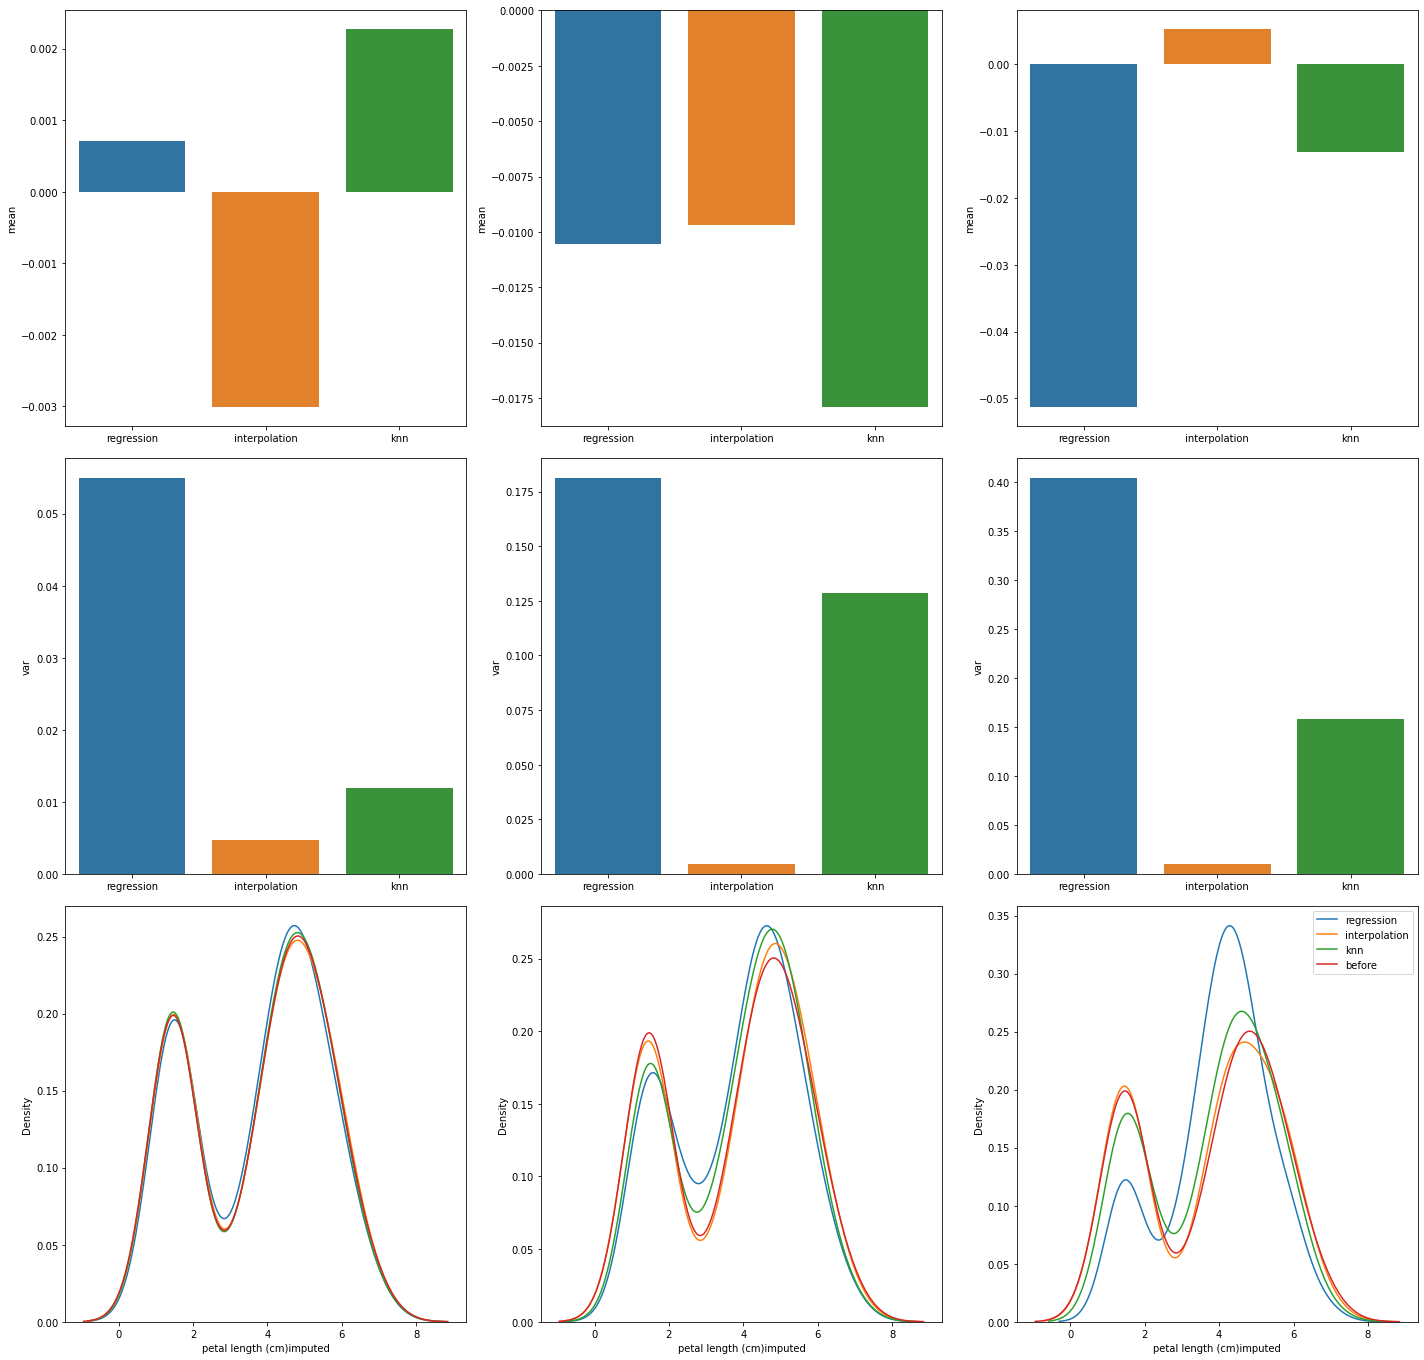

In [9]:
iris=iris_original.copy(deep=True)
iris.isnull().sum()
comparingbar(iris,list(iris_original.columns),k="petal length (cm)")

In [28]:
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

바가 위로 올라가면 과소추정, 바가 아래로 내려가면 과대추정  
regression은 확실히 분산을 과소추정하고 있으며 가장 심함  
전반적으로 interpolation이 중반쯤은 가는 것처럼 보임   

## 2. GME 데이터
### 2.0 데이터 분석

In [10]:
GME=pd.read_csv(PATH+"GME_stock.csv")
display(GME)

,date,open_price,high_price,low_price,close_price,volume,adjclose_price
0,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006
1,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010
2,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996
3,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001
4,2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002
...,...,...,...,...,...,...,...
4768,2002-02-20,9.600000,9.875000,9.525000,9.875000,1723200.0,6.648838
4769,2002-02-19,9.900000,9.900000,9.375000,9.550000,1852600.0,6.430017
4770,2002-02-15,10.000000,10.025000,9.850000,9.950000,2097400.0,6.699336
4771,2002-02-14,10.175000,10.195000,9.925000,10.000000,2755400.0,6.733003


In [30]:
GME.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773 entries, 0 to 4772
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            4773 non-null   object 
 1   open_price      4773 non-null   float64
 2   high_price      4773 non-null   float64
 3   low_price       4773 non-null   float64
 4   close_price     4773 non-null   float64
 5   volume          4773 non-null   float64
 6   adjclose_price  4773 non-null   float64
dtypes: float64(6), object(1)
memory usage: 261.1+ KB


In [86]:
## datetime을 index로 바꾸고 오름차순으로 정렬

GME['date']=GME['date'].apply(lambda x:datetime.datetime.strptime(x, "%Y-%m-%d"))
GME.index=GME.date
display(GME.head())
GME=GME.sort_index()
GME.drop(GME[['date']],axis=1,inplace=True)
GME_original=GME.copy(deep=True)

,date,open_price,high_price,low_price,close_price,volume,adjclose_price
date,,,,,,,
2021-01-28,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006
2021-01-27,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010
2021-01-26,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996
2021-01-25,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001
2021-01-22,2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002


<AxesSubplot:>

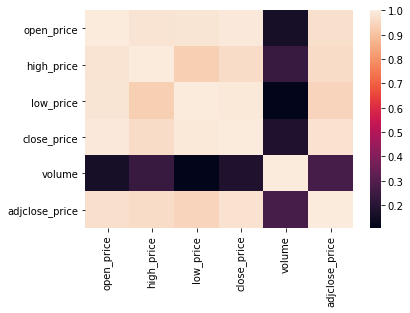

In [32]:
sns.heatmap(GME.corr())

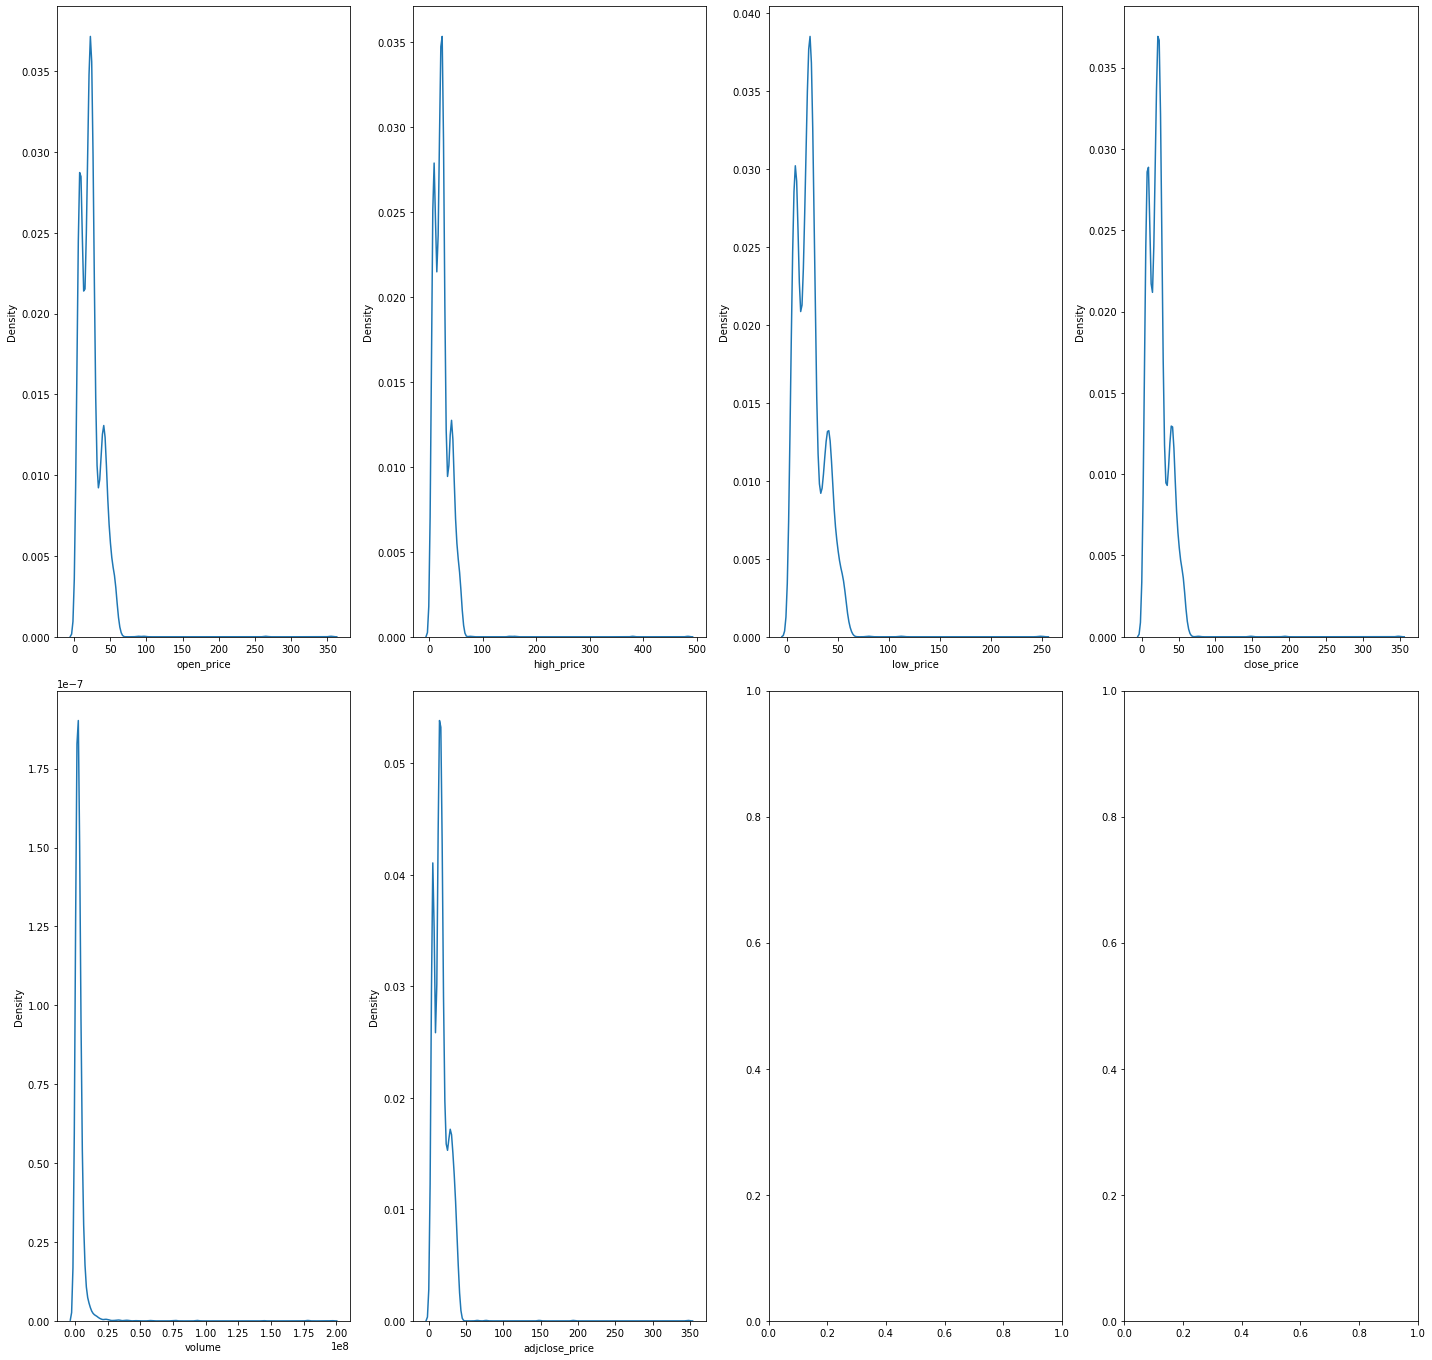

In [33]:
fig,axes=plt.subplots(2,4,figsize=(20,20))
for i,col in enumerate(GME.columns):
    sns.kdeplot(GME[col],ax=axes[int(i/4)][i%4])
plt.tight_layout(rect=[0, 0, 1, 0.95]) 

In [34]:
display(GME.corr())

,open_price,high_price,low_price,close_price,volume,adjclose_price
open_price,1.000000,0.979230,0.983531,0.994380,0.159918,0.973626
high_price,0.979230,1.000000,0.933568,0.964880,0.240094,0.964430
low_price,0.983531,0.933568,1.000000,0.989899,0.106601,0.945227
close_price,0.994380,0.964880,0.989899,1.000000,0.181149,0.976725
volume,0.159918,0.240094,0.106601,0.181149,1.000000,0.271683
adjclose_price,0.973626,0.964430,0.945227,0.976725,0.271683,1.000000


In [35]:
## volume을 제외한 모든 변수들이 강한 상관관계를 가지고 있는 것으로 보임
## 그리고 대부분의 분포가 skewed 됐음을 알 수 있음(혹은 넓은 분포)

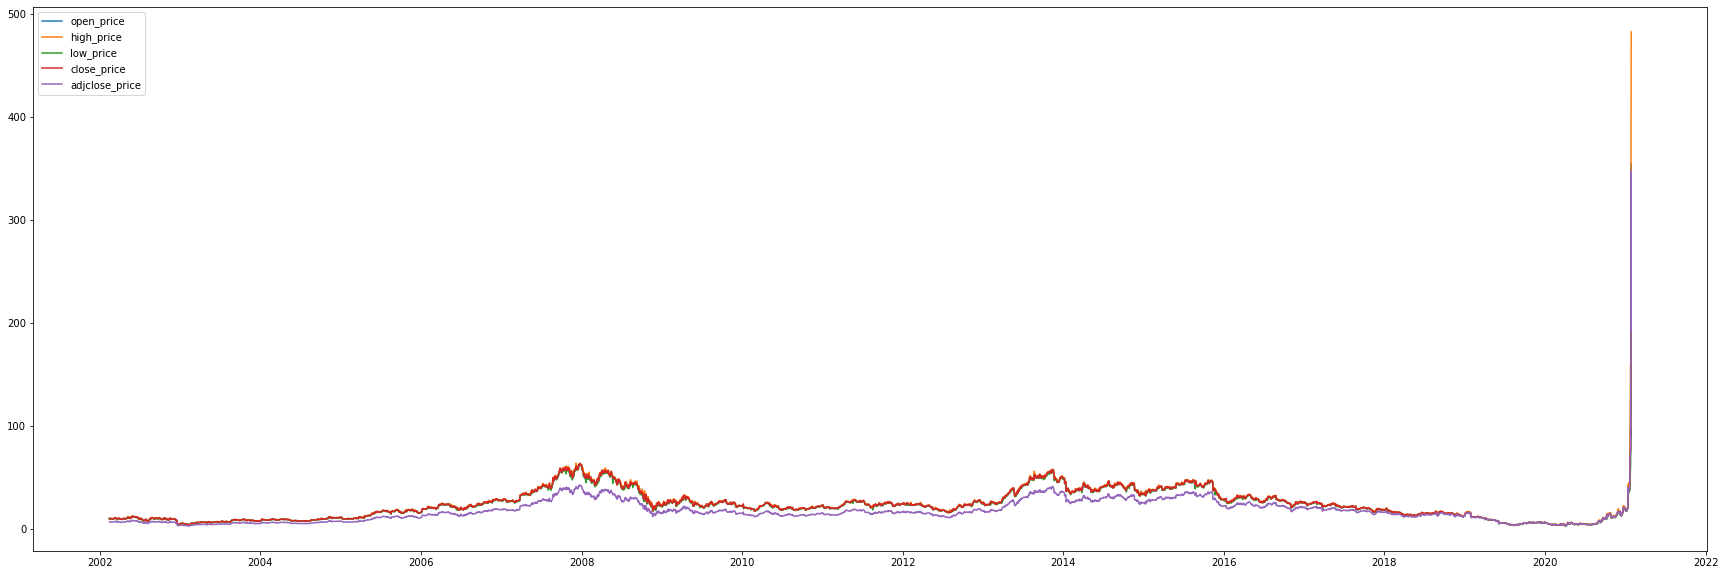

In [37]:
fig=plt.figure(figsize=(30,10))
for i,col in enumerate(GME.columns):
    if i==4:pass
    else:
        plt.plot(GME.index,GME[col],label=col)
        plt.legend()
plt.show()

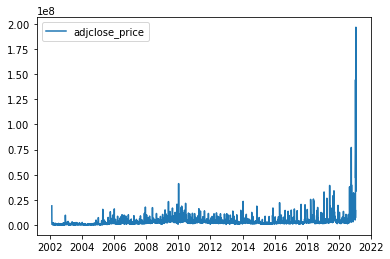

In [38]:
plt.plot(GME.index,GME['volume'],label=col)
plt.legend()
plt.show()

### 2.1 하나의 col에만 존재하는 경우
#### 2.1.1regression impute(10%, 30%, 50%)
#### 2.1.2 linear interpolaton(10%, 30%, 50%)
#### 2.1.3 knn impute(10%, 30%, 50%)

regreesion 이용에 걸린 시간은 -0.015594244003295898입니다
values 방법을 이용합니다.
interpolation 이용에 걸린 시간은 0.0입니다
knn 이용에 걸린 시간은 0.10711956024169922입니다


,sum,mean,var
regression,-0.000588,-0.000588,0.014291
interpolation,-0.000116,-0.000116,-0.000116
knn,-0.002776,-0.002776,0.020422


No handles with labels found to put in legend.


regreesion 이용에 걸린 시간은 -0.015625입니다
values 방법을 이용합니다.
interpolation 이용에 걸린 시간은 0.0입니다
knn 이용에 걸린 시간은 0.3456566333770752입니다


,sum,mean,var
regression,-0.003333,-0.003333,0.099213
interpolation,-0.000654,-0.000654,-0.002534
knn,-0.003552,-0.003552,0.071155


No handles with labels found to put in legend.


regreesion 이용에 걸린 시간은 -0.0156252384185791입니다
values 방법을 이용합니다.
interpolation 이용에 걸린 시간은 0.0입니다
knn 이용에 걸린 시간은 0.5263998508453369입니다


,sum,mean,var
regression,-0.001905,-0.001905,0.304864
interpolation,0.000159,0.000159,0.031136
knn,-0.004927,-0.004927,0.266397


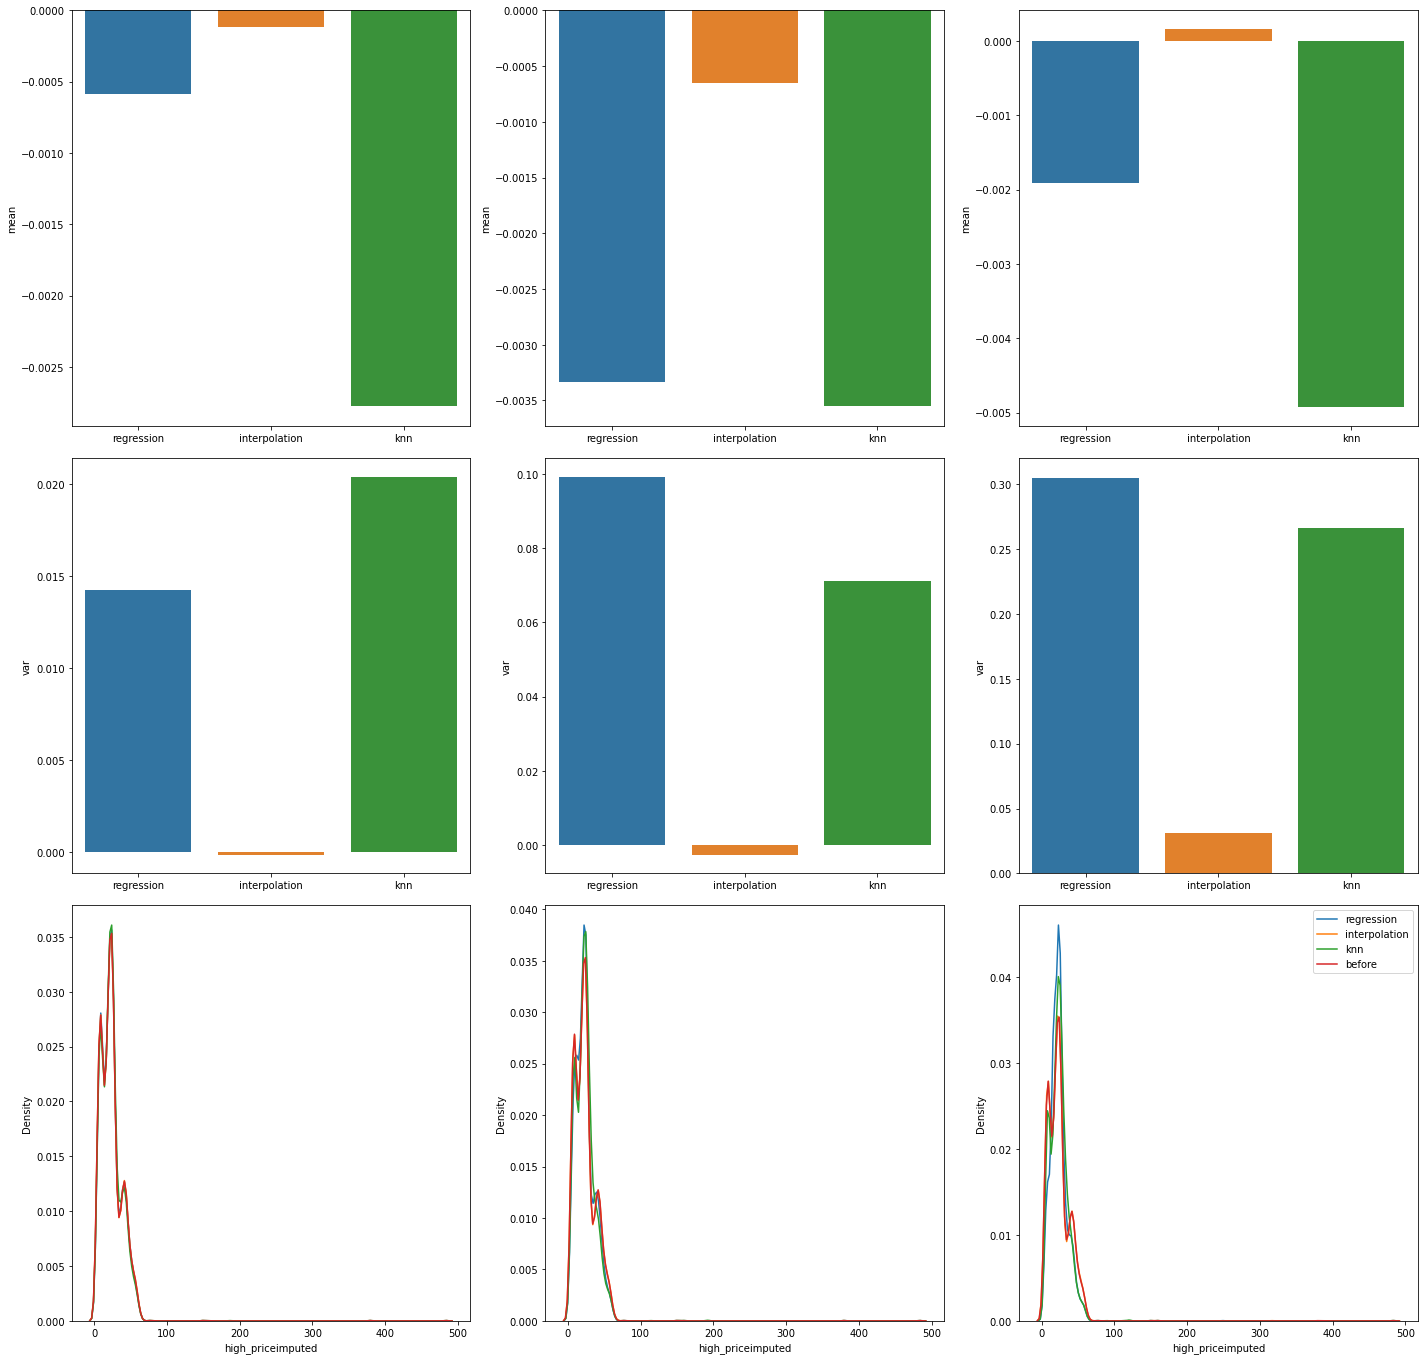

In [11]:
## 10% mean ### 30% mean ## 50% mean
######################################
## 10% var ## 30% var ## 50% var


comparingbar(GME,['high_price'],k="high_price")

In [75]:
GME.isnull().sum()

open_price        0
high_price        0
low_price         0
close_price       0
volume            0
adjclose_price    0
dtype: int64

### 2.2 모든 col에만 존재하는 경우
#### 2.2.1regression impute(10%, 30%, 50%)
#### 2.2.2 linear interpolaton(10%, 30%, 50%)
#### 2.2.3 knn impute(10%, 30%, 50%)

regreesion 이용에 걸린 시간은 -0.046848297119140625입니다
values 방법을 이용합니다.
interpolation 이용에 걸린 시간은 0.0입니다
knn 이용에 걸린 시간은 0.6410396099090576입니다


,sum,mean,var
regression,0.001239,0.001239,0.003433
interpolation,-0.000018,-0.000018,0.000204
knn,0.000509,0.000509,0.001593


No handles with labels found to put in legend.


regreesion 이용에 걸린 시간은 -0.04684925079345703입니다
values 방법을 이용합니다.
interpolation 이용에 걸린 시간은 0.0입니다
knn 이용에 걸린 시간은 1.6176471710205078입니다


,sum,mean,var
regression,-0.000316,-0.000316,-0.090709
interpolation,-0.001443,-0.001443,-0.038304
knn,0.000646,0.000646,0.018286


No handles with labels found to put in legend.


regreesion 이용에 걸린 시간은 -0.04685044288635254입니다
values 방법을 이용합니다.
interpolation 이용에 걸린 시간은 0.0입니다
knn 이용에 걸린 시간은 2.4168286323547363입니다


,sum,mean,var
regression,-0.011931,-0.011931,-0.152595
interpolation,-0.003968,-0.003968,-0.099581
knn,0.001005,0.001005,0.051995


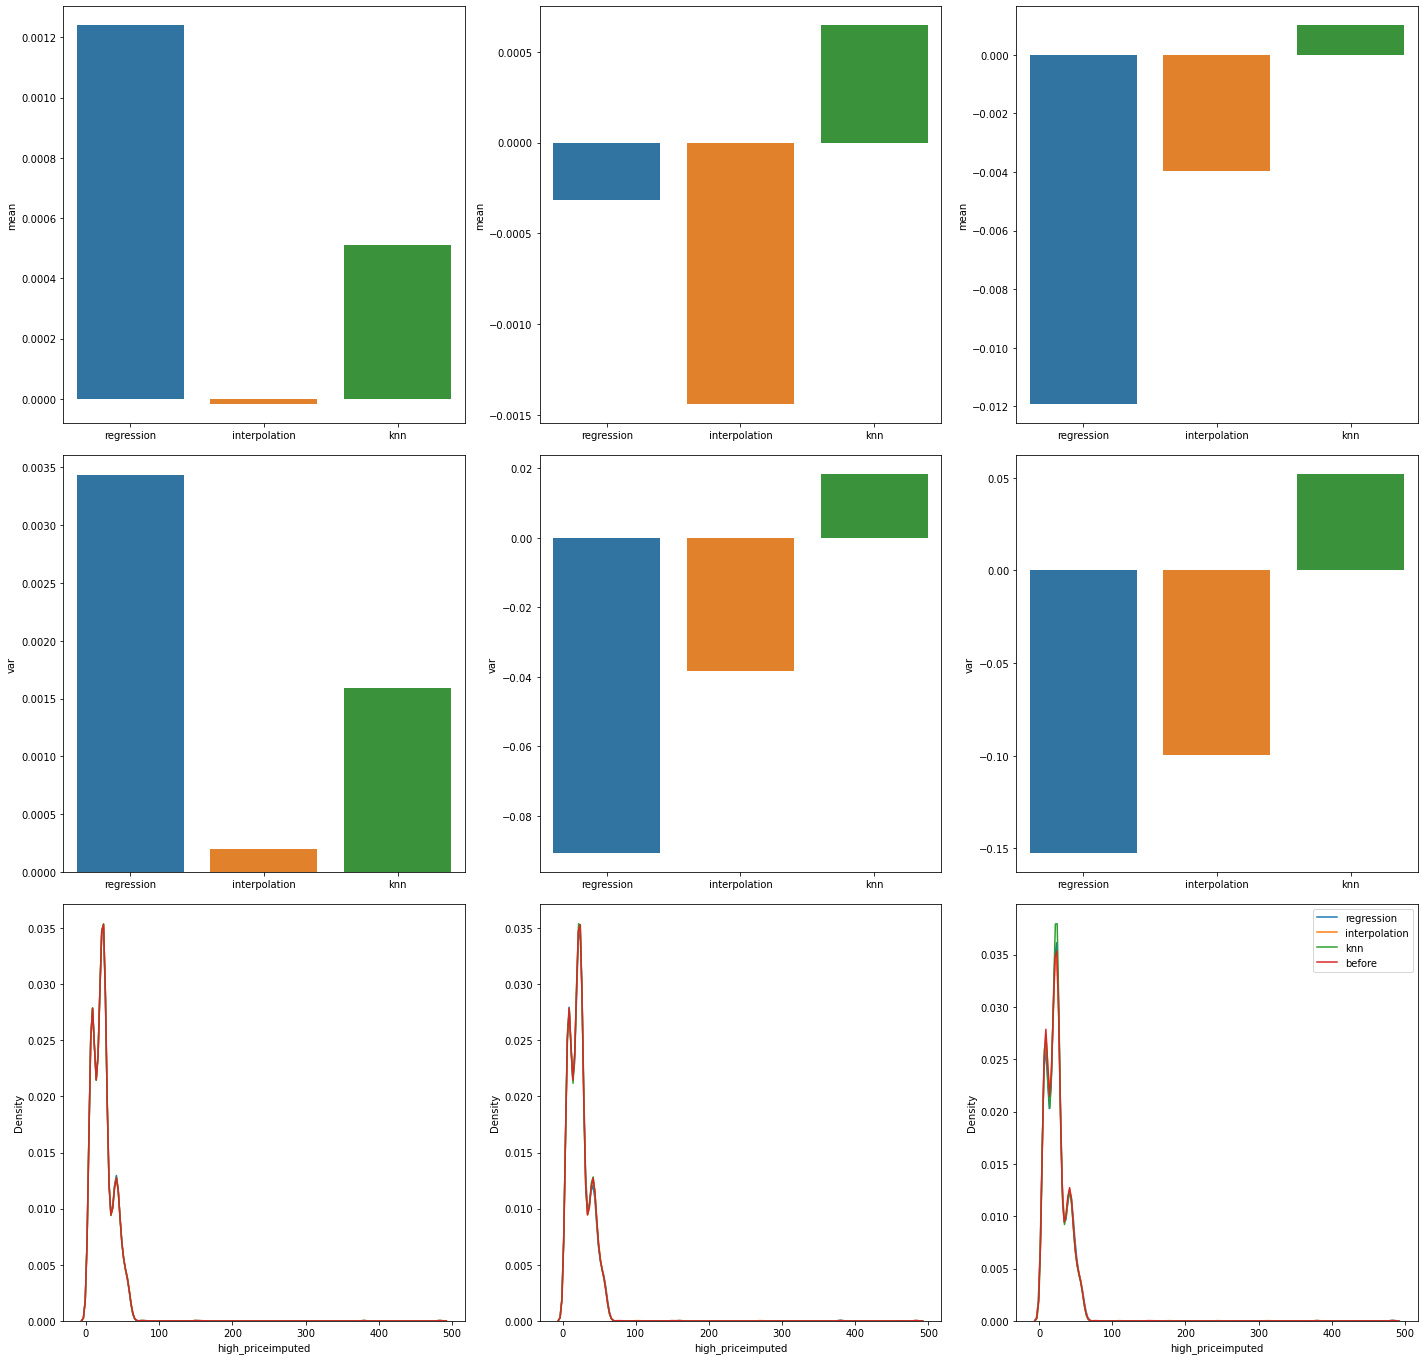

In [12]:
## 10% mean ### 30% mean ## 50% mean
######################################
## 10% var ## 30% var ## 50% var


comparingbar(GME,list(GME.columns),k="high_price")

## 3. fraud 데이터
### 3.0 데이터 분석

In [6]:
fraud=pd.read_csv(PATH+"creditcard.csv")
display(fraud)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


<AxesSubplot:>

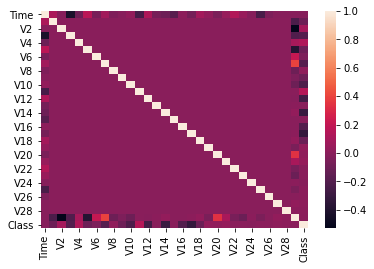

In [47]:
sns.heatmap(fraud.corr())

In [50]:
display(fraud.corr())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,...,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,...,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,...,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,...,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,...,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,...,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,...,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,...,4.578389e-17,2.871855e-17,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.044246,-0.097733


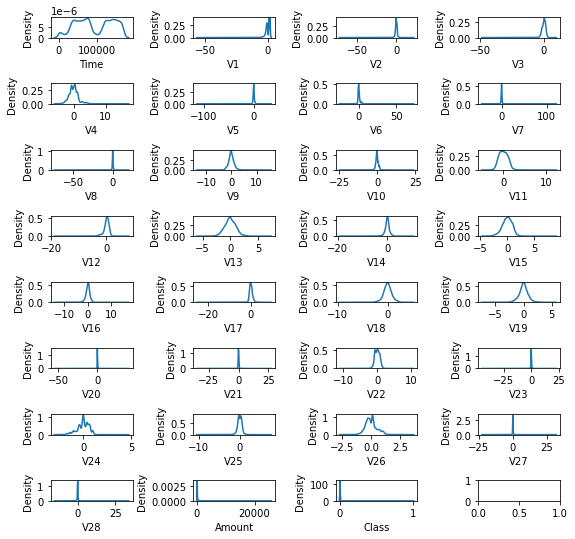

In [48]:
fig,axes=plt.subplots(8,4,figsize=(8,8))
for i,col in enumerate(fraud.columns):
    sns.kdeplot(fraud[col],ax=axes[int(i/4)][i%4])
plt.tight_layout(rect=[0, 0, 1, 0.95]) 

In [49]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [13]:
## 변수들 간에 이렇다할 상관관계는 나타나지 않는 것처럼 보임
## 그리고 대부분 정규분포를 따르는 것처럼 보임
## 데이터 셋이 너무 크니까 일단 좀 줄여볼까?

In [7]:
fraud=pd.DataFrame(fraud.iloc[:100000,],columns=fraud.columns)
display(fraud)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,67374.0,-1.336121,1.671947,0.994155,0.420318,-0.440923,-0.008386,-0.893860,-2.051884,-1.091297,...,-1.135695,0.509302,0.074188,0.266186,-0.117614,-0.515392,-0.049653,0.085873,2.50,0
99996,67374.0,0.662465,-1.336560,0.791566,0.425701,-1.391976,0.145471,-0.476652,0.203164,1.379204,...,-0.063744,-0.548785,-0.103769,0.136687,-0.078936,0.948579,-0.075607,0.053555,269.83,0
99997,67374.0,-4.930001,-1.090715,0.298037,1.890524,-1.058087,-0.329315,-1.498278,1.750301,-0.325311,...,0.051768,0.166222,-0.585006,0.219239,0.181934,-0.253197,0.113801,-1.043315,45.00,0
99998,67374.0,0.982019,-0.161026,0.534280,0.714558,0.108865,1.154723,-0.298831,0.417264,0.368293,...,-0.074225,0.088060,0.158234,-0.580906,0.100103,0.373722,0.047812,0.005941,27.88,0


### 3.1 하나의 col에만 존재하는 경우
#### 3.1.1regression impute(10%, 30%, 50%)
#### 3.1.2 linear interpolaton(10%, 30%, 50%)
#### 3.1.3 knn impute(10%, 30%, 50%)

regreesion 이용에 걸린 시간은 -0.21872162818908691입니다
values 방법을 이용합니다.
interpolation 이용에 걸린 시간은 0.06250882148742676입니다
knn 이용에 걸린 시간은 69.3982834815979입니다


,sum,mean,var
regression,0.000621,0.000621,0.093323
interpolation,-0.019200,-0.019200,0.045428
knn,-0.029235,-0.029235,0.073283


No handles with labels found to put in legend.


regreesion 이용에 걸린 시간은 -0.20415878295898438입니다
values 방법을 이용합니다.
interpolation 이용에 걸린 시간은 0.09703445434570312입니다
knn 이용에 걸린 시간은 185.61289238929749입니다


,sum,mean,var
regression,0.024848,0.024848,0.288675
interpolation,0.036737,0.036737,0.134413
knn,-0.022166,-0.022166,0.223660


No handles with labels found to put in legend.


regreesion 이용에 걸린 시간은 -0.18407464027404785입니다
values 방법을 이용합니다.
interpolation 이용에 걸린 시간은 0.06251978874206543입니다
knn 이용에 걸린 시간은 292.94244742393494입니다


,sum,mean,var
regression,0.137410,0.137410,0.492539
interpolation,0.071007,0.071007,0.210994
knn,0.079974,0.079974,0.375302


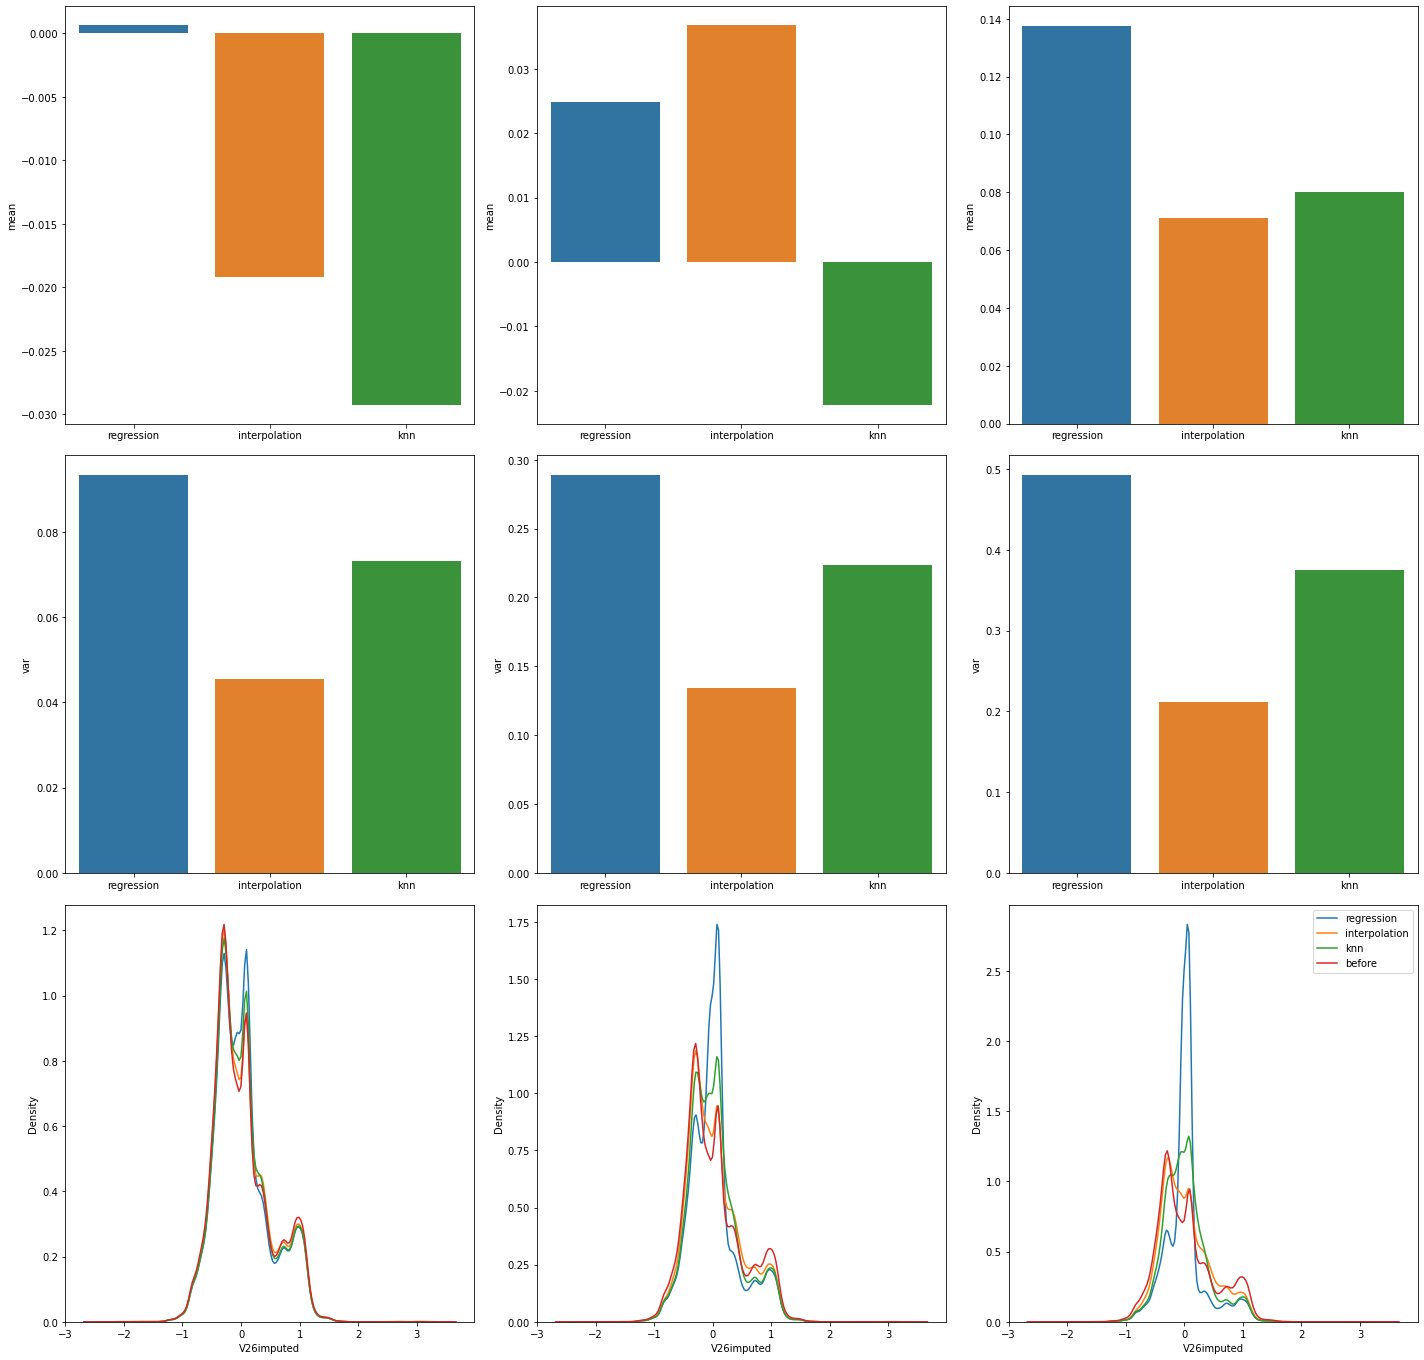

In [14]:
## 10% mean ### 30% mean ## 50% mean
######################################
## 10% var ## 30% var ## 50% var


comparingbar(fraud,["V26"],k="V26")

In [ ]:
## 일단 regression은 데이터셋이 너무 많아지니까 다 돌아가는데 어려움이 있음
## 그거는 knn도 마찬가지 왜냐하면 모든 점들의 거리를 측정해야 하니까 당연하지
## 그래서 일단 다 비교하려면 다 돌려볼 수 있어야 하는데 거기에 한계가 있을 것 같음 

In [35]:
print(f"Amount skewness: { skew(fraud['Amount'])}")
print(f"Time skewness: {skew(fraud['Time'])}")

Amount skewness: 14.077469891751992
Time skewness: -0.7356660865213247


In [8]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
method1=MinMaxScaler()
method1.fit(fraud)
fraud_1=method1.transform(fraud)

method2=RobustScaler()
method2.fit(fraud)
fraud_2=method2.transform(fraud)

In [9]:
fraud_1=pd.DataFrame(fraud_1,columns=fraud.columns)
fraud_2=pd.DataFrame(fraud_2,columns=fraud.columns)

[           Time        V1        V2        V3        V4        V5        V6  \
 0      0.000000  0.943114  0.792888  0.955424  0.299283  0.543337  0.546786   
 1      0.000000  0.986831  0.796587  0.892906  0.256794  0.548514  0.535598   
 2      0.000015  0.943139  0.779055  0.935292  0.253671  0.541195  0.574268   
 3      0.000015  0.949857  0.791661  0.935814  0.196879  0.547600  0.562904   
 4      0.000030  0.946568  0.803263  0.929370  0.254733  0.542442  0.539259   
 ...         ...       ...       ...       ...       ...       ...       ...   
 99995  0.999985  0.943520  0.811931  0.914740  0.255523  0.542004  0.537117   
 99996  0.999985  0.977761  0.779094  0.909396  0.255769  0.529645  0.540277   
 99997  0.999985  0.881947  0.781777  0.896376  0.322692  0.533984  0.530526   
 99998  0.999985  0.983236  0.791925  0.902609  0.268966  0.549149  0.561005   
 99999  1.000000  0.822738  0.866642  0.815468  0.135742  0.532585  0.538013   
 
              V7        V8        V9  

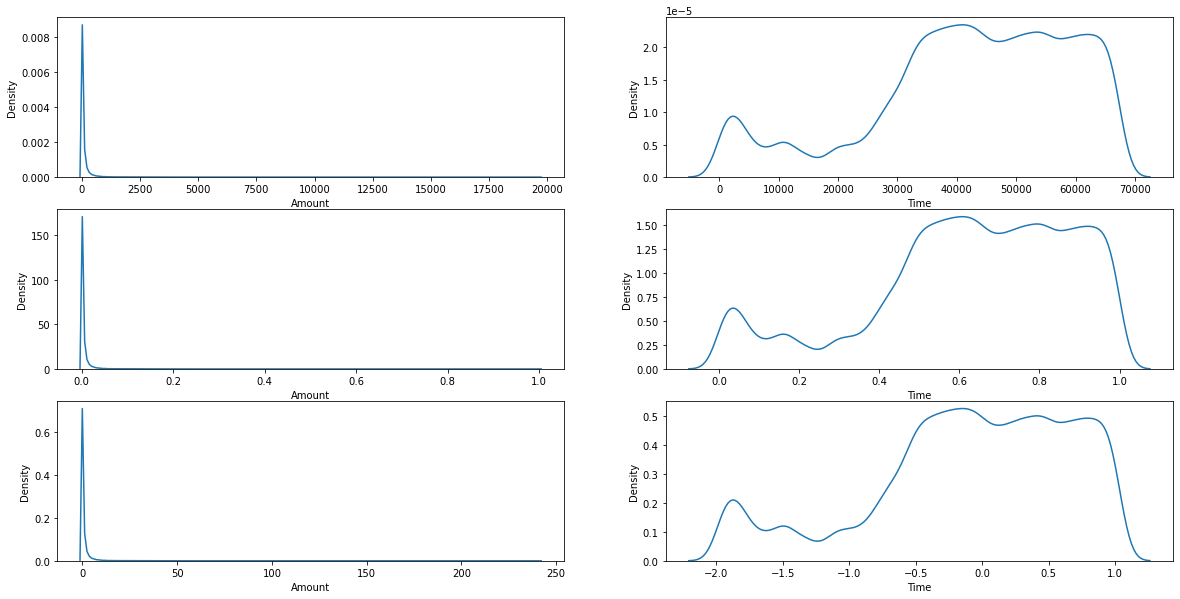

In [44]:
## knn의 성능에 데이터 스케일링이 중요하다고 그래서 데이터를 한번 스케일링 해보자
## 그럴려면 이 중에서 제일 이질적인 분포를 가진 것 같은 Amount를 어떻게 해야겠지 그리고 타임이랑
## 아 근데 스케일링이 한 feature에 대해서 되는 건 아니고 모든 feature에 대해서 동시에 돌더라는 거 기억해
fig,axes=plt.subplots(3,2,figsize=(20,10))
sns.kdeplot(fraud["Amount"],ax=axes[0][0])
sns.kdeplot(fraud["Time"],ax=axes[0][1])
sns.kdeplot(fraud_1["Amount"],ax=axes[1][0])
sns.kdeplot(fraud_1["Time"],ax=axes[1][1])
sns.kdeplot(fraud_2["Amount"],ax=axes[2][0])
sns.kdeplot(fraud_2["Time"],ax=axes[2][1])
plt.show()



regreesion 이용에 걸린 시간은 -0.1669619083404541입니다
values 방법을 이용합니다.
interpolation 이용에 걸린 시간은 0.06250381469726562입니다
knn 이용에 걸린 시간은 68.28536677360535입니다


,sum,mean,var
regression,0.000022,0.000022,0.093346
interpolation,-0.000200,-0.000200,0.045428
knn,0.000349,0.000349,0.040803


No handles with labels found to put in legend.


regreesion 이용에 걸린 시간은 -0.16878318786621094입니다
values 방법을 이용합니다.
interpolation 이용에 걸린 시간은 0.06250929832458496입니다
knn 이용에 걸린 시간은 184.29235005378723입니다


,sum,mean,var
regression,0.000233,0.000233,0.288857
interpolation,0.000382,0.000382,0.134413
knn,0.000949,0.000949,0.125413


No handles with labels found to put in legend.


regreesion 이용에 걸린 시간은 -0.18972373008728027입니다
values 방법을 이용합니다.
interpolation 이용에 걸린 시간은 0.08336448669433594입니다
knn 이용에 걸린 시간은 283.4047772884369입니다


,sum,mean,var
regression,0.001244,0.001244,0.493191
interpolation,0.000739,0.000739,0.210994
knn,0.001494,0.001494,0.224801


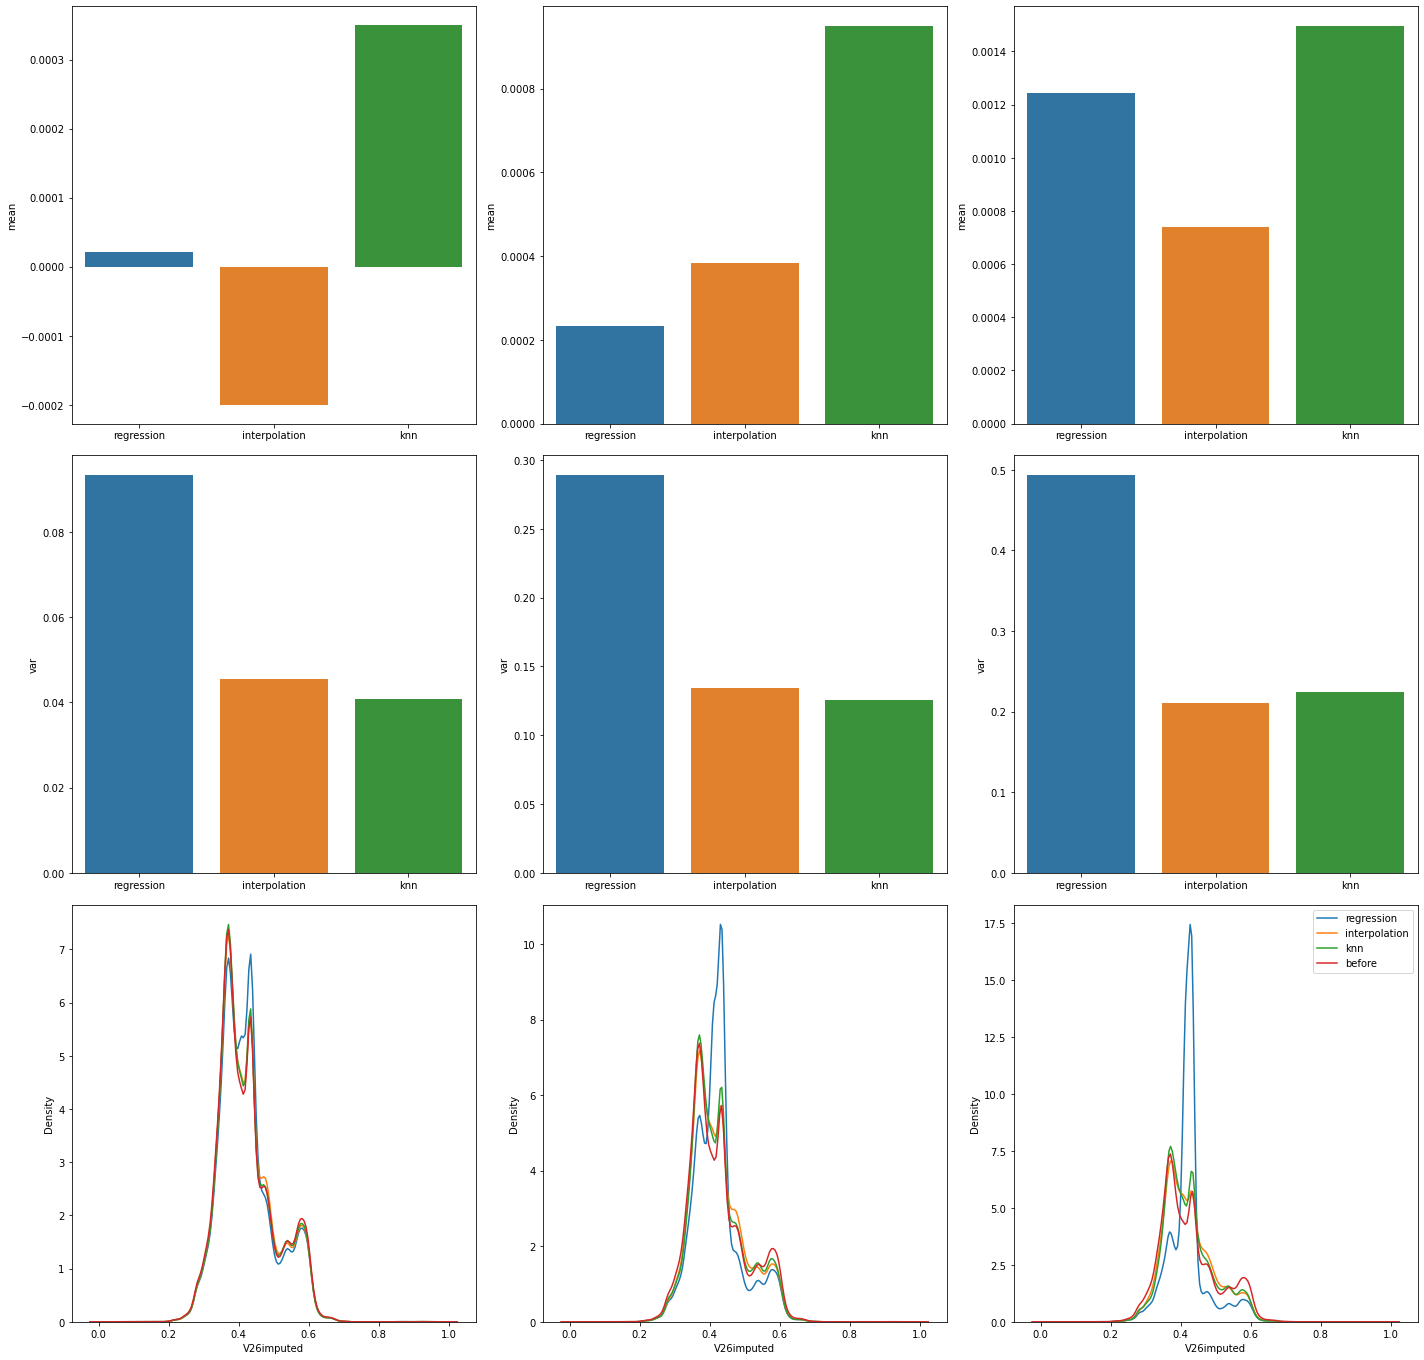

In [46]:
## minmaxscaler 를 썼을 때 결과 
## 10% mean ### 30% mean ## 50% mean
######################################
## 10% var ## 30% var ## 50% var


comparingbar(fraud_1,["V26"],k="V26")

In [ ]:
## 10% mean ### 30% mean ## 50% mean
######################################
## 10% var ## 30% var ## 50% var
######################################
## 10% kde ## 30% kde ## 50% kde
comparingbar(fraud_2,["V26"],k="V26")

### 3.2 모든 col에만 존재하는 경우
#### 3.2.1. regression impute(10%, 30%, 50%)
#### 3.2.2 linear interpolaton(10%, 30%, 50%)
#### 3.2.3 knn impute(10%, 30%, 50%)

랜덤으로 없애는 것 까지는 완료했는데 문제가 생긴거야?
values 방법을 이용합니다.
interpolation 이용에 걸린 시간은 0.19538307189941406입니다


,sum,mean,var
interpolation,1.735830e+11,1.723565e+11,0.046728


KeyboardInterrupt: 

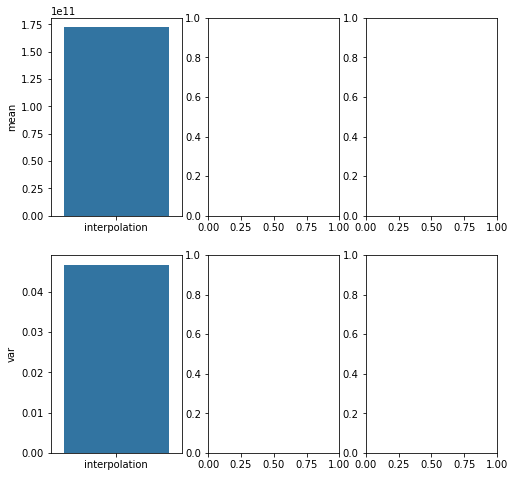

In [72]:
## 10% mean ### 30% mean ## 50% mean
######################################
## 10% var ## 30% var ## 50% var


comparingbar(fraud,["V26", "Amount"],k="V26")

In [76]:
## (약)결론 : knn의 성능은 괜찮지만, 너무 오래걸리는 게 문제점
##           :nterpolation의 성능은 대체적으로 knn과 regression의 가운데지만, 이 만한 성과를 내는데 이만한 시간이면 효율성이 괜찮은 듯
##           :regression은 그냥 과소추정이 너무 심각하고, 시간도 오래걸리는 문제점 존재
##=> 결국 난 뭘 건져야 할 것인가..?

In [2]:
pip install Gnuplot

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement Gnuplot (from versions: none)
ERROR: No matching distribution found for Gnuplot


In [6]:
import gnuplot

ModuleNotFoundError: No module named 'gnuplot'

In [7]:
from gplot import *

ModuleNotFoundError: No module named 'gplot'